In [1]:
current_dir = '/content/drive/MyDrive/Apziva/Potential Talents/'

In [2]:
data_dir = current_dir + 'dataset.csv'

In [51]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


import nltk
import re
import string

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords


from collections import Counter

#similarity measure - cosine similarity
from scipy.spatial.distance import cosine
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [5]:
df = pd.read_csv(data_dir).set_index('id')
print(df.shape)
df.head()

(104, 4)


,job_title,location,connection,fit
id,,,,
1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN
2,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN
3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
4,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN


In [6]:
df.dtypes

job_title      object
location       object
connection     object
fit           float64
dtype: object

In [7]:
df['fit'].unique()

array([nan])

In [8]:
#drop the fit column because it containns no information
df.drop('fit',axis=1,inplace=True)

In [9]:
df.connection.unique()

array(['85', '500+ ', '44', '1', '61', '2', '390', '57', '82', '5', '7',
       '16', '212', '409', '52', '455', '174', '268', '50', '4', '40',
       '18', '349', '155', '39', '64', '9', '415', '19', '71', '48',
       '103', '49'], dtype=object)

In [10]:
df['connection'] = df['connection'].replace(['500+ '],'501')

In [11]:
df.isna().sum()

job_title     0
location      0
connection    0
dtype: int64

In [12]:
df.isnull().sum()

job_title     0
location      0
connection    0
dtype: int64

In [13]:
df.describe()

,job_title,location,connection
count,104,104,104
unique,52,41,33
top,2019 C.T. Bauer College of Business Graduate (...,Kanada,501
freq,7,12,44


In [14]:
df.location.value_counts()

Kanada                                 12
Raleigh-Durham, North Carolina Area     8
Houston, Texas Area                     8
Greater New York City Area              7
Houston, Texas                          7
Denton, Texas                           6
San Francisco Bay Area                  5
Greater Philadelphia Area               5
İzmir, Türkiye                          4
Lake Forest, California                 4
Atlanta, Georgia                        4
Chicago, Illinois                       2
Austin, Texas Area                      2
Greater Atlanta Area                    2
Amerika Birleşik Devletleri             2
Long Beach, California                  1
Milpitas, California                    1
Greater Chicago Area                    1
Torrance, California                    1
Greater Los Angeles Area                1
Bridgewater, Massachusetts              1
Lafayette, Indiana                      1
Kokomo, Indiana Area                    1
Las Vegas, Nevada Area            

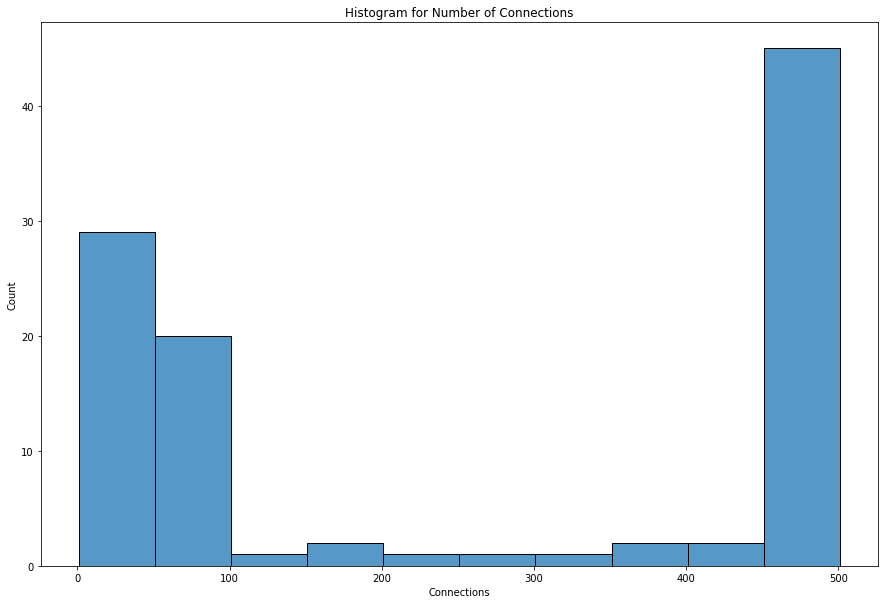

In [15]:
plt.figure(figsize = [15,10])
sns.histplot(df.connection.apply(int), bins = 10)
plt.xlabel("Connections")
plt.title("Histogram for Number of Connections")
plt.show()

In [16]:
df.duplicated()

id
1      False
2      False
3      False
4      False
5      False
       ...  
100    False
101    False
102    False
103    False
104    False
Length: 104, dtype: bool

In [17]:
df.duplicated().unique()

array([False,  True])

In [18]:
#Find Duplicate Rows
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
 
duplicate

Duplicate Rows :


,job_title,location,connection
id,,,
9,Student at Humber College and Aspiring Human R...,Kanada,61
14,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85
15,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85
16,Native English Teacher at EPIK (English Progra...,Kanada,501
17,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44
18,People Development Coordinator at Ryan,"Denton, Texas",501
19,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85
20,Native English Teacher at EPIK (English Progra...,Kanada,501
21,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44


In [19]:
#number of duplicate rows in the total dataset
df.loc[df.duplicated(), :]
print(df.duplicated().sum())

51


In [20]:
#drop the duplicate rows from the df
df.drop_duplicates(inplace=True)
df.shape

(53, 3)

In [21]:
def preprocess_text(text):
    
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)

    lemmatiser = WordNetLemmatizer()
    lemmas = [lemmatiser.lemmatize(token.lower(),pos='v') for token in tokens]

    keywords= [lemma for lemma in lemmas if lemma not in stopwords.words('english')]
    x=' '.join(keywords)
    x=' '.join([w for w in x.split() if len(w)>1]) 
    x = re.sub("[+*,.|()${}&\-'!@]", '', x)  #cleanup special characters
    x= re.sub('\w*\d\w*','', x)             #remove numbers
    return x

In [22]:
df['job_title_cleaned'] = df.job_title.apply(preprocess_text)

In [23]:
df['job_title_cleaned']

id
1       bauer college business graduate magna cum lau...
2      native english teacher epik english program korea
3                    aspire human resources professional
4                    people development coordinator ryan
5           advisory board member celal bayar university
6                      aspire human resources specialist
7      student humber college aspire human resources ...
8                                   hr senior specialist
10         seek human resources hris generalist position
11                            student chapman university
12     svp chro market communications csr officer eng...
13     human resources coordinator intercontinental b...
27     aspire human resources management student seek...
28                    seek human resources opportunities
66     experience retail manager aspire human resourc...
67            human resources staff recruit professional
68                  human resources specialist luxottica
69     director human resour

In [24]:
df[df['job_title_cleaned'].str.contains('hr')]

,job_title,location,connection,job_title_cleaned
id,,,,
8,HR Senior Specialist,San Francisco Bay Area,501,hr senior specialist
10,Seeking Human Resources HRIS and Generalist Po...,Greater Philadelphia Area,501,seek human resources hris generalist position
12,"SVP, CHRO, Marketing & Communications, CSR Off...","Houston, Texas Area",501,svp chro market communications csr officer eng...
83,HR Manager at Endemol Shine North America,"Los Angeles, California",268,hr manager endemol shine north america


In [25]:
df[df['job_title_cleaned'].str.contains('gphr')]['job_title_cleaned']

id
12    svp chro market communications csr officer eng...
Name: job_title_cleaned, dtype: object

In [26]:
#replace abbreviations
df.replace({'job_title_cleaned': {'svp': 'senior vice president','gphr' : 'global professional in human resources', 'hris' : 'human resources information system',
                                  'csr' : 'corporate social responsibility','hr' : 'human resources', 'chro' : 'chief human resources officer', }}, regex=True, inplace=True)

In [27]:
df[df['job_title_cleaned'].str.contains('hr')]

,job_title,location,connection,job_title_cleaned
id,,,,


In [28]:
df.job_title_cleaned.value_counts()

aspire human resources professional                                                                                                                                                              2
 bauer college business graduate magna cum laude aspire human resources professional                                                                                                             1
lead official western illinois university                                                                                                                                                        1
senior human resources business partner heil environmental                                                                                                                                       1
aspire human resources professional energetic team focus leader                                                                                                                                  1
human resources manager e

In [29]:
count_dict = Counter()
for title in df.job_title_cleaned:
    for word in title.split(" "):
        count_dict[word] += 1

print(len(count_dict) ,'words in the job title column')
count_dict.most_common(10)

183 words in the job title column


[('resources', 39),
 ('human', 38),
 ('aspire', 13),
 ('professional', 10),
 ('seek', 10),
 ('manager', 7),
 ('university', 6),
 ('student', 6),
 ('management', 6),
 ('', 5)]

# Rank candidates based on their fit for the position

In [30]:
keyword = 'aspiring human resources'
keyword = preprocess_text(keyword)

In [31]:
print(keyword)

aspire human resources


In [ ]:
keyword = [keyword]

## Prepare Corpus

In [45]:
corpus=df['job_title_cleaned'].tolist()

## TF IDF Vectorizer

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [33]:
tfidf_vectorizer = TfidfVectorizer() 



## Fit and transform TF IDF to the corpus


In [46]:
jobs_vectorized = tfidf_vectorizer.fit_transform(corpus)

In [47]:
feature_names = tfidf_vectorizer.get_feature_names()                  
print("Number of unique features: ", len(feature_names)) 
print("First 5 features: ", feature_names[:5]) 

Number of unique features:  182
First 5 features:  ['administration', 'administrative', 'admissions', 'advisory', 'always']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [48]:
tfidf_vector = jobs_vectorized.toarray()                                  
print("Shape of tf-idf vector: ", tfidf_vector.shape)  

Shape of Tfidf vector:  (53, 182)


## General Function to Calculate Similarity

In [76]:
def cos_similarity(u, v):
    # Dot product
    dp = np.dot(u, v)
    
    # Norms of u and v
    norm_u = np.sqrt(np.sum(u**2))
    norm_v = np.sqrt(np.sum(v**2))
    
    # Special case, if product of norms is 0:
    # avoids division by 0
    if np.isclose(norm_u * norm_v, 0, atol=1e-32):
        return 0
    
    # Computes cosine similarity
    cos_similarity = dp / (norm_u * norm_v)
    
    return cos_similarity

In [87]:
def similarity(vectorizer, target_title, vectors_jobs, df, column_name):
    # Convert search phrase into a vector
    target_title = vectorizer.transform(target_title)                    
    target_vector = target_title.toarray()
    print("Shape of keywords vector:", target_vector.shape)
    
    # Calcualte tf-idf cosine similarity and add it to the dataframe
    scores = []
    for i in range (len(vectors_jobs)):
        #scores.append(cos_similarity(target_vector, vectors_jobs[i]))
        scores.append(1 - cosine(vectors_jobs[i], target_vector))
        #cosine_sim = cosine_similarity(jobs_vectorized[x], target_vector)

    df[column_name] = scores
    return df

In [88]:
similar_df = similarity(tfidf_vectorizer, keyword, tfidf_vector, df, 'tf_idf_fit')

Shape of keywords vector: (1, 182)


In [89]:
similar_df.sort_values(by ='tf_idf_fit', ascending = False).head()

,job_title,location,connection,job_title_cleaned,fit,tf_idf_fit
id,,,,,,
97,Aspiring Human Resources Professional,"Kokomo, Indiana Area",71,aspire human resources professional,0.765002,0.765002
3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,aspire human resources professional,0.765002,0.765002
6,Aspiring Human Resources Specialist,Greater New York City Area,1,aspire human resources specialist,0.673329,0.673329
73,"Aspiring Human Resources Manager, seeking inte...","Houston, Texas Area",7,aspire human resources manager seek internship...,0.606927,0.606927
27,Aspiring Human Resources Management student se...,"Houston, Texas Area",501,aspire human resources management student seek...,0.431808,0.431808


In [91]:
similar_df.sort_values(by ='tf_idf_fit', ascending = False).head(10)

,job_title,location,connection,job_title_cleaned,fit,tf_idf_fit
id,,,,,,
97,Aspiring Human Resources Professional,"Kokomo, Indiana Area",71,aspire human resources professional,0.765002,0.765002
3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,aspire human resources professional,0.765002,0.765002
6,Aspiring Human Resources Specialist,Greater New York City Area,1,aspire human resources specialist,0.673329,0.673329
73,"Aspiring Human Resources Manager, seeking inte...","Houston, Texas Area",7,aspire human resources manager seek internship...,0.606927,0.606927
27,Aspiring Human Resources Management student se...,"Houston, Texas Area",501,aspire human resources management student seek...,0.431808,0.431808
72,Business Management Major and Aspiring Human R...,"Monroe, Louisiana Area",5,business management major aspire human resourc...,0.429455,0.429455
66,Experienced Retail Manager and aspiring Human ...,"Austin, Texas Area",57,experience retail manager aspire human resourc...,0.403297,0.403297
74,Human Resources Professional,Greater Boston Area,16,human resources professional,0.393063,0.393063
7,Student at Humber College and Aspiring Human R...,Kanada,61,student humber college aspire human resources ...,0.389175,0.389175


In [90]:
similar_df.sort_values(by ='tf_idf_fit', ascending = True).head()

,job_title,location,connection,job_title_cleaned,fit,tf_idf_fit
id,,,,,,
104,Director Of Administration at Excellence Logging,"Katy, Texas",501,director administration excellence log,0.0,0.0
90,Undergraduate Research Assistant at Styczynski...,Greater Atlanta Area,155,undergraduate research assistant styczynski lab,0.0,0.0
103,Always set them up for Success,Greater Los Angeles Area,501,always set success,0.0,0.0
86,Information Systems Specialist and Programmer ...,"Gaithersburg, Maryland",4,information systems specialist programmer love...,0.0,0.0
92,Seeking employment opportunities within Custom...,"Torrance, California",64,seek employment opportunities within customer ...,0.0,0.0


# Starring Candidates

Approach: When we star a candidate, we feel that the candidate's job title/summary fits the best to the particular role in mind. Therefore, we use that candidate's job title as the new keyword to search for.

In [101]:
df.loc[74].job_title_cleaned

'human resources professional'

In [102]:
def star_candidate(star_id, df):
  starred_jobdesc = df.loc[star_id].job_title
  return starred_jobdesc



In [103]:
new_keyword = star_candidate(74, similar_df)

In [105]:
new_keyword = [new_keyword]

In [106]:
reranked_df = similarity(tfidf_vectorizer, new_keyword, tfidf_vector, df, 'reranked_tf_idf')

Shape of keywords vector: (1, 182)


In [109]:
reranked_df.sort_values(by='reranked_tf_idf', ascending=False).head()

,job_title,location,connection,job_title_cleaned,fit,tf_idf_fit,reranked_tf_idf
id,,,,,,,
74,Human Resources Professional,Greater Boston Area,16,human resources professional,0.393063,0.393063,1.000000
3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,aspire human resources professional,0.765002,0.765002,0.811692
97,Aspiring Human Resources Professional,"Kokomo, Indiana Area",71,aspire human resources professional,0.765002,0.765002,0.811692
67,"Human Resources, Staffing and Recruiting Profe...","Jackson, Mississippi Area",501,human resources staff recruit professional,0.192955,0.192955,0.490901
66,Experienced Retail Manager and aspiring Human ...,"Austin, Texas Area",57,experience retail manager aspire human resourc...,0.403297,0.403297,0.427911
